In [39]:
import numpy as np
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import minimize, differential_evolution

In [60]:
sodalime = ml.open_material('sodalime', 'Material')
SiN = ml.open_material('SiN', 'Sellmeier')
SiO2 = ml.open_material('SiO2', 'Sellmeier')
ITO = ml.open_material('ITO', 'Sellmeier')
Acrylic = ml.open_material('Acrylic', 'Sellmeier')
air = ml.Non_Dispersion(1)
ml_t = ml.Non_Dispersion(1.5)
LOCA = ml.Non_Dispersion(1.4)

In [68]:
TE = []
TM = []
angle = []
wl = np.linspace(400, 700, 100000)

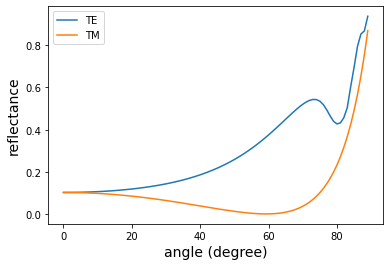

In [5]:
model = tm.Design([air, SiO2, SiN, sodalime], [None, 20, 20, None])
for a in range(0, 90):
    TE.append(sum(model.reflectance(x, a, 'S'))/50)
    TM.append(sum(model.reflectance(x, a, 'P'))/50)
    angle.append(a)
plt.plot(angle, TE, label = 'TE')
plt.plot(angle, TM, label = 'TM')
plt.legend(loc = 'best') 
plt.xlabel('angle (degree)', fontsize=14)
plt.ylabel('reflectance', fontsize=14)
#plt.savefig('abg.png')
plt.show()

In [43]:
x = 550
ITO.nvalues(550)
SiO2.nvalues(550)
sodalime.nvalues(550)

array(1.52513873)

In [39]:
target_R  = tm.Design([air, sodalime], [None, None]).reflectance(x)
hypo_R = lambda th: tm.Design([air, SiO2, ITO, SiO2, sodalime], [None, th[0], 20, None]).reflectance(x)
fom = lambda th: abs(hypo_R(th) - target_R)
res = minimize(fom, [100])
print(res)
print(hypo_R(res.x))
print(target_R)

      fun: 5.927681956396924e-12
 hess_inv: array([[20554.15089131]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 117
      nit: 2
     njev: 39
   status: 0
  success: True
        x: array([77.5024611])
[0.04324915]
[0.04324915]


In [58]:
def fom(th):
    ml_t.n = th[0]
    d = th[1]
    R1 = np.mean(tm.Design([air, SiO2, ml_t, sodalime],[None, 1000, d, None]).reflectance(wl))
    R2 = np.mean(tm.Design([air, SiO2, ITO, ml_t, sodalime],[None, 1000, 20, d, None]).reflectance(wl))
    print(R1, R2)
    return abs(R1 - R2)

In [57]:
differential_evolution(fom, [(0, 2), (0, 200)])

     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 4623
     nit: 151
 success: True
       x: array([  1.91592661, 119.13512789])

In [59]:
fom([1.91592661, 119.13512789])

0.04936838081871455 0.04936838084852394


2.98093910666708e-11

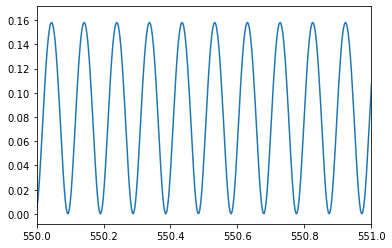

In [70]:
test = tm.Design([air, sodalime, air], [None, 1e6, None]).reflectance(wl)
plt.plot(wl, test)
plt.xlim(550, 551)
plt.show()